# Purpose
研究婚外情的數據

(1) 該位外遇的可能性有多大？ 
(2) 影響外遇的原因是什麼？ 
(3) 可以根據分析結果說明如何降低外遇的發生嗎？

# 數據說明

* 婚外情數據即著名的“Fair’s Affairs”，取自於1969年《今日心理》（Psychology Today）所做的一個代表性調查
* 該數據從601個參與者身上收集了9個變量
* 變數包括一年來婚外情的頻率以及參與者性別、年齡、婚齡、是否有小孩、宗教信仰程度、學歷、職業，還有對婚姻的自我評分

#### affairs 受訪者在過去一年中進行外遇的頻率         
0 = 無         
1 = 一次       
2 = 兩次         
3 = 三倍         
7 = 4 - 10 次         
12 = 每月或更多         

#### gender          
0 = 女性         
1 = 男性         

#### age         
17.5 = 20 歲以下         
22.0 = 20 - 24         
27.0 = 25 - 29         
32.0 = 30 - 34         
37.0 = 35 - 39         
42.0 = 40 - 44         
47.0 = 45 - 49         
52.0 = 50 - 54         
57.0 = 55 或以上         

#### yearsmarried  婚姻時間                  
0.125 = 3 個月或更短         
0.417 = 4 - 6 個月         
0.750 = 6 個月 - 1 年         
1.500 = 1 - 2 年         
4.000 = 3 - 5 年         
7.000 = 6 - 8 年         
10.00 = 9 - 11 年         
15.00 = 12 年或更長時間         

#### children 孩子人數                  
0 = 無         
1 = 一個或多個         
         
#### religiousness 婚內的宗教信仰         
1 = 反宗教         
2 = 完全沒有         
3 = 輕微         
4 = 有點         
5 = 非常         

#### education 教育程度         
9.0 = 小學         
12.0 = 高中畢業         
14.0 = 一些大學         
16.0 = 大學畢業生         
17.0 = 一些畢業作品         
18.0 = 碩士學位         
20.0 = 博士、醫學博士或其他高級學位 

#### occupation 詳見data-descriptions.pdf

#### rating 對婚姻的自我評分 (5分制，1表示非常不幸福，5表示非常幸福）         

# 1. import data

In [1]:
import warnings

warnings.filterwarnings("ignore")
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('Affairs.csv')
df.head()

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,0,male,37.0,10.00,no,3,18,7,4
1,0,female,27.0,4.00,no,4,14,6,4
2,0,female,32.0,15.00,yes,1,12,1,4
3,0,male,57.0,15.00,yes,5,18,6,5
4,0,male,22.0,0.75,no,2,17,6,3


### <span style="color:#3498DB">Point: 請先將affairs變數轉為二值型因子'ynaffair'，外遇0次為0，外遇一次以上為1</span>

In [3]:
df.columns

Index(['affairs', 'gender', 'age', 'yearsmarried', 'children', 'religiousness',
       'education', 'occupation', 'rating'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   affairs        601 non-null    int64  
 1   gender         601 non-null    object 
 2   age            601 non-null    float64
 3   yearsmarried   601 non-null    float64
 4   children       601 non-null    object 
 5   religiousness  601 non-null    int64  
 6   education      601 non-null    int64  
 7   occupation     601 non-null    int64  
 8   rating         601 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 42.4+ KB


In [5]:
df.describe()

,affairs,age,yearsmarried,religiousness,education,occupation,rating
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000
mean,1.455907,32.487521,8.177696,3.116473,16.166389,4.194676,3.931780
std,3.298758,9.288762,5.571303,1.167509,2.402555,1.819443,1.103179
min,0.000000,17.500000,0.125000,1.000000,9.000000,1.000000,1.000000
25%,0.000000,27.000000,4.000000,2.000000,14.000000,3.000000,3.000000
50%,0.000000,32.000000,7.000000,3.000000,16.000000,5.000000,4.000000
75%,0.000000,37.000000,15.000000,4.000000,18.000000,6.000000,5.000000
max,12.000000,57.000000,15.000000,5.000000,20.000000,7.000000,5.000000


In [6]:
df.isnull().sum()


affairs          0
gender           0
age              0
yearsmarried     0
children         0
religiousness    0
education        0
occupation       0
rating           0
dtype: int64

In [7]:
for col in ["religiousness", "education", "occupation", "rating"]:
    df[col] = df[col].astype(object)
df["affairs"] = df["affairs"].apply(lambda x: 1 if x > 1 else 0).astype(object)
print(df["affairs"])
df.info()

0      0
1      0
2      0
3      0
4      0
      ..
596    0
597    1
598    1
599    1
600    0
Name: affairs, Length: 601, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   affairs        601 non-null    object 
 1   gender         601 non-null    object 
 2   age            601 non-null    float64
 3   yearsmarried   601 non-null    float64
 4   children       601 non-null    object 
 5   religiousness  601 non-null    object 
 6   education      601 non-null    object 
 7   occupation     601 non-null    object 
 8   rating         601 non-null    object 
dtypes: float64(2), object(7)
memory usage: 42.4+ KB


In [8]:
# 資料前處理
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# 資料切分
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# 分類模型
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# 回歸模型
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# 評估指標
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report, mean_squared_error, r2_score

# 聚類
from sklearn.cluster import KMeans

# 降維
from sklearn.decomposition import PCA


先觀察類別型資料與外遇之間的趨勢

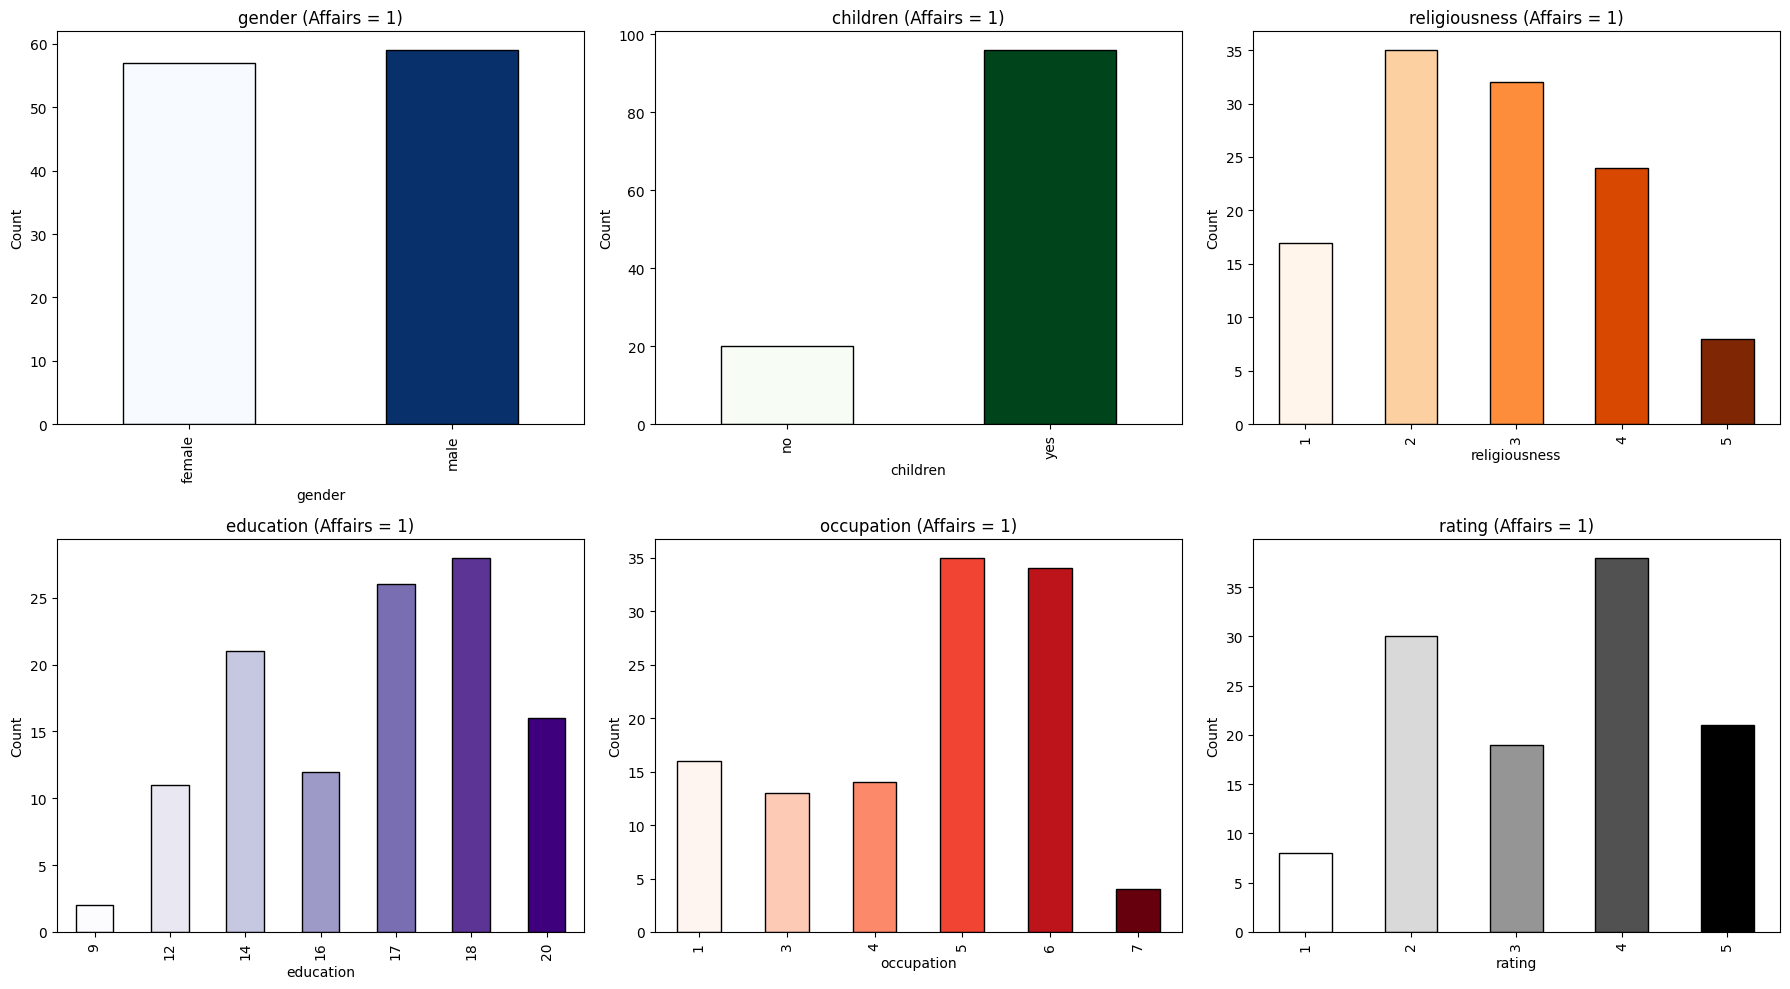

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 假設 df 已存在，且 df["affairs"] 是二元分類（0/1）
# 篩選出有外遇者
df_affair = df[df["affairs"] == 1]

# 六個類別型特徵
features = ["gender", "children", "religiousness", "education", "occupation", "rating"]

# 使用不同的 colormap 提供漸層色系
colormaps = [plt.cm.Blues, plt.cm.Greens, plt.cm.Oranges, plt.cm.Purples, plt.cm.Reds, plt.cm.Greys]

# 建立 2x3 畫布
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# 繪製每個特徵的漸層直方圖
for idx, feature in enumerate(features):
    ax = axes[idx]
    counts = df_affair[feature].value_counts().sort_index()
    cmap = colormaps[idx % len(colormaps)]
    colors = [cmap(i / (len(counts)-1)) for i in range(len(counts))]

    counts.plot(kind="bar", ax=ax, color=colors, edgecolor="black")
    ax.set_title(f"{feature} (Affairs = 1)")
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()


觀察數值型資料與外遇的關係

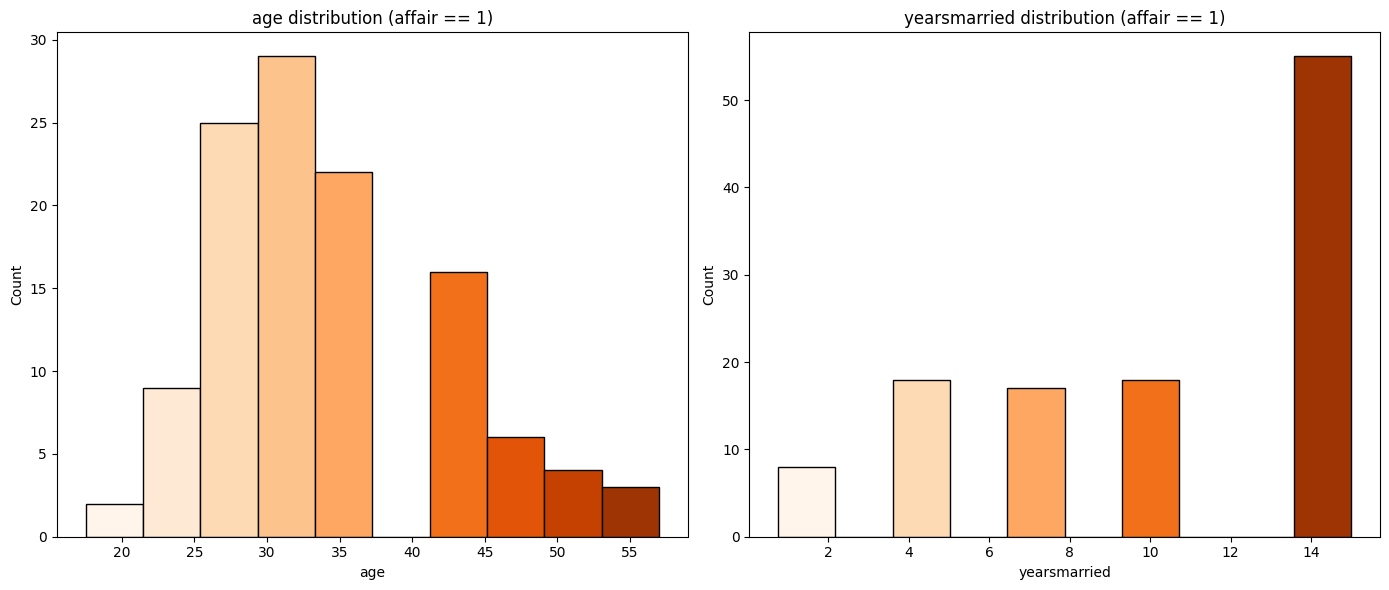

In [10]:
from matplotlib.cm import get_cmap

df_affair = df[df["affairs"] == 1]

# 數值型欄位
features = ["age", "yearsmarried"]

# 建立畫布
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 顏色漸層 colormap
cmap = get_cmap("Oranges")

for idx, feature in enumerate(features):
    # 建立 bins 並取得對應漸層顏色
    bins = 10  # 可根據需要調整
    n, bins_edges, patches = axes[idx].hist(
        df_affair[feature],
        bins=bins,
        edgecolor="black"
    )
    
    # 套用漸層顏色
    for i in range(len(patches)):
        patches[i].set_facecolor(cmap(i / len(patches)))
    
    axes[idx].set_title(f"{feature} distribution (affair == 1)")
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel("Count")

plt.tight_layout()
plt.show()

資料分割

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 處理資料

scaler = MinMaxScaler(feature_range=(0, 1))
df[['age', 'yearsmarried']] = scaler.fit_transform(df[['age', 'yearsmarried']])


dummies_df = pd.get_dummies(df[['gender', 'age', 'yearsmarried', 'children', 'religiousness',
       'education', 'occupation', 'rating']], drop_first=True)
X = dummies_df
y = df["affairs"].astype(int)

# 切分資料（類別平衡）
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=526
)

# 模型訓練與預測
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 評估
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

coefficients = model.coef_       # 取出一維係數向量
intercept = model.intercept_[0]

feature_names = X.columns
coefs = model.coef_[0]

# 組成 DataFrame 以便觀察
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefs
})

# 按照絕對值排序（由影響力大到小）
coef_df['|Coefficient|'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='|Coefficient|', ascending=False)

print(coef_df[['Feature', 'Coefficient']])




Accuracy: 0.8181818181818182
            Feature  Coefficient
1      yearsmarried     1.553844
7   religiousness_5    -1.416754
23         rating_5    -1.069001
6   religiousness_4    -0.964921
15     occupation_3     0.924046
16     occupation_4     0.888540
20         rating_2     0.864679
14     occupation_2    -0.829004
9      education_14    -0.724721
0               age    -0.649509
4   religiousness_2    -0.596368
5   religiousness_3    -0.551625
22         rating_4    -0.532949
21         rating_3    -0.428851
11     education_17     0.416331
10     education_16    -0.367482
18     occupation_6     0.337451
3      children_yes     0.114740
13     education_20    -0.097130
12     education_18     0.078039
8      education_12     0.071211
19     occupation_7    -0.029724
2       gender_male    -0.020973
17     occupation_5     0.019799


利用for 迴圈尋找準確值大於0.8的random_state值

In [12]:
# list = []
# for seed in range(1,1000000):
#     X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, stratify=y, random_state= seed)

# # 模型訓練與預測
#     model = LogisticRegression(class_weight='balanced', max_iter=1000)
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     accuracy = metrics.accuracy_score(y_test, y_pred)

#     if accuracy >= 0.80:
#         list.append({"accuracy" : accuracy, "seed" : seed})
# print(list)



Precision: 0.5161290322580645
Recall: 0.6956521739130435
F1 Score: 0.5925925925925926


<Figure size 2800x2000 with 0 Axes>

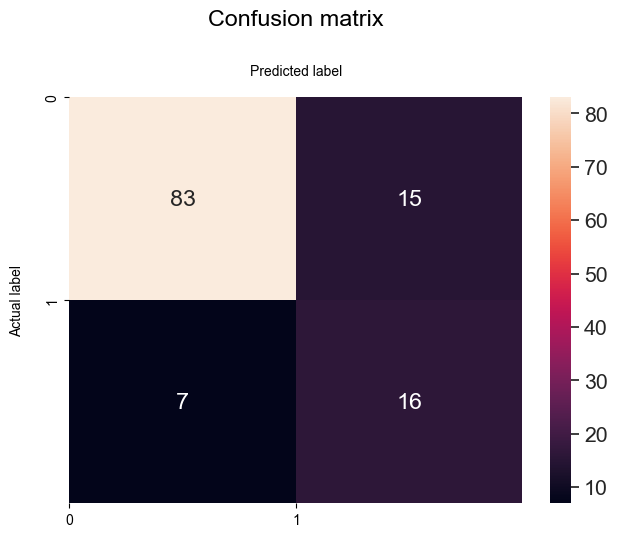

In [13]:
import seaborn as sn

# Create the Confusion matrix
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))

fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')

class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

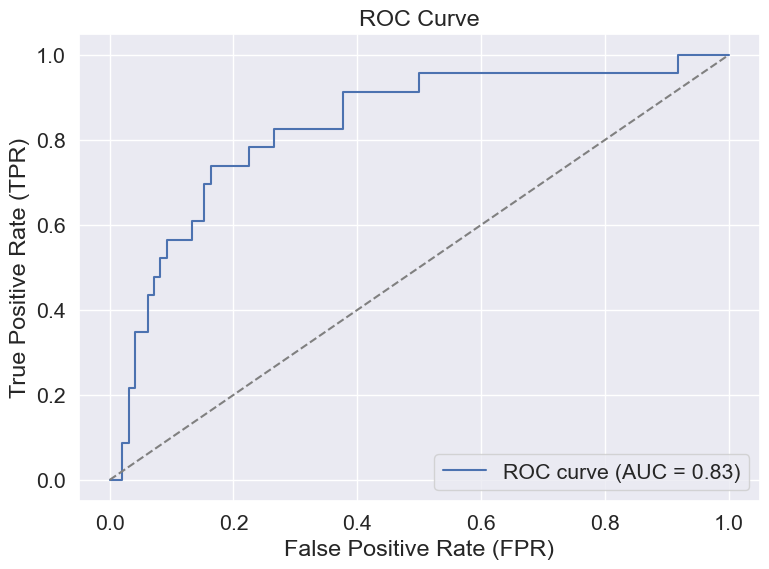

In [14]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 預測機率（class 1 的機率）
y_proba = model.predict_proba(X_test)[:, 1]

# 計算 FPR, TPR, 閾值
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# 計算 AUC
auc_score = roc_auc_score(y_test, y_proba)

# 畫 ROC 曲線
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # baseline
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
from sklearn.svm import SVC

model_svm = SVC(kernel='rbf') 
model_svm.fit(X_train,y_train)
y_test_pred_svm = model_svm.predict(X_test)
metrics.accuracy_score(y_test, y_test_pred_svm)

0.8016528925619835

Precision: 0.5161290322580645
Recall: 0.6956521739130435
F1 Score: 0.5925925925925926


<Figure size 2800x2000 with 0 Axes>

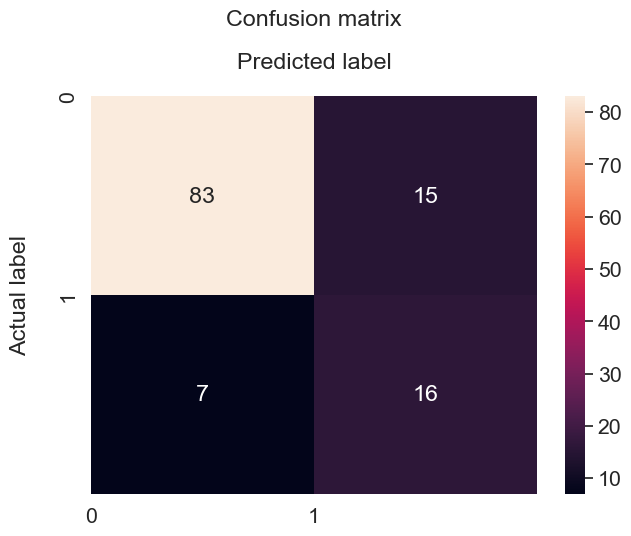

In [16]:
import seaborn as sn

# Create the Confusion matrix
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))

fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')

class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

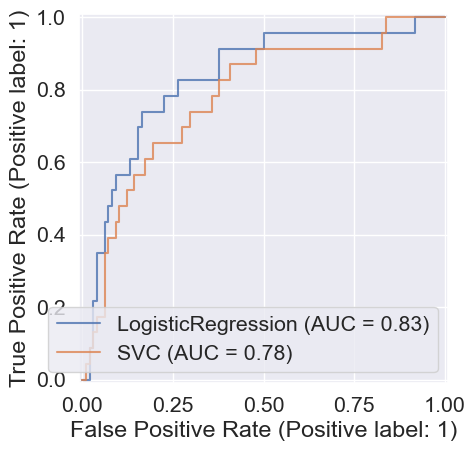

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

ax = plt.gca()
log_disp = RocCurveDisplay.from_estimator(model, X_test, y_test, ax=ax, alpha=0.8)
svm_disp = RocCurveDisplay.from_estimator(model_svm, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

In [18]:
df = pd.read_csv('Affairs.csv')
df.head()

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,0,male,37.0,10.00,no,3,18,7,4
1,0,female,27.0,4.00,no,4,14,6,4
2,0,female,32.0,15.00,yes,1,12,1,4
3,0,male,57.0,15.00,yes,5,18,6,5
4,0,male,22.0,0.75,no,2,17,6,3


In [19]:
for col in ["religiousness", "education", "occupation", "rating"]:
    df[col] = df[col].astype(object)
df["affairs"] = df["affairs"].apply(lambda x: 1 if x > 1 else 0).astype(object)
print(df["affairs"])
df.info()

0      0
1      0
2      0
3      0
4      0
      ..
596    0
597    1
598    1
599    1
600    0
Name: affairs, Length: 601, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   affairs        601 non-null    object 
 1   gender         601 non-null    object 
 2   age            601 non-null    float64
 3   yearsmarried   601 non-null    float64
 4   children       601 non-null    object 
 5   religiousness  601 non-null    object 
 6   education      601 non-null    object 
 7   occupation     601 non-null    object 
 8   rating         601 non-null    object 
dtypes: float64(2), object(7)
memory usage: 42.4+ KB


In [20]:
scaler = MinMaxScaler(feature_range=(0, 1))
df[['age', 'yearsmarried']] = scaler.fit_transform(df[['age', 'yearsmarried']])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=526
)

In [21]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(criterion = 'gini')  # CART, 默認為gini
clf = model_dt.fit(X_train, y_train)

# Make predictions
y_test_pred_dt = model_dt.predict(X_test)
print(metrics.accuracy_score(y_test, y_test_pred_dt))

0.768595041322314


Precision: 0.5161290322580645
Recall: 0.6956521739130435
F1 Score: 0.5925925925925926


<Figure size 2800x2000 with 0 Axes>

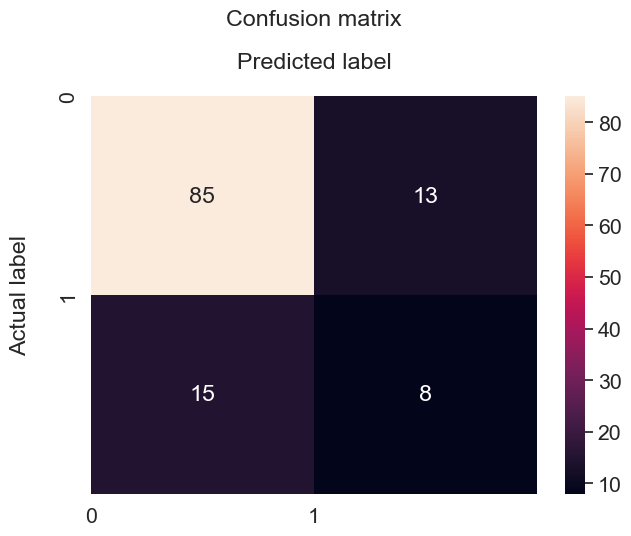

In [22]:
cm = confusion_matrix(y_test, y_test_pred_dt) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))

fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')

class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

In [23]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

preprocessor = make_pipeline(SelectKBest(f_classif, k=8)) # 挑選出K個分數最高的特徵
DecisionTree = make_pipeline(preprocessor,DecisionTreeClassifier(random_state=0))

In [24]:
DecisionTree.get_params().keys()

dict_keys(['memory', 'steps', 'transform_input', 'verbose', 'pipeline', 'decisiontreeclassifier', 'pipeline__memory', 'pipeline__steps', 'pipeline__transform_input', 'pipeline__verbose', 'pipeline__selectkbest', 'pipeline__selectkbest__k', 'pipeline__selectkbest__score_func', 'decisiontreeclassifier__ccp_alpha', 'decisiontreeclassifier__class_weight', 'decisiontreeclassifier__criterion', 'decisiontreeclassifier__max_depth', 'decisiontreeclassifier__max_features', 'decisiontreeclassifier__max_leaf_nodes', 'decisiontreeclassifier__min_impurity_decrease', 'decisiontreeclassifier__min_samples_leaf', 'decisiontreeclassifier__min_samples_split', 'decisiontreeclassifier__min_weight_fraction_leaf', 'decisiontreeclassifier__monotonic_cst', 'decisiontreeclassifier__random_state', 'decisiontreeclassifier__splitter'])

In [25]:
hyper_params_dt = {
    'decisiontreeclassifier__max_leaf_nodes':[10,20,30],    # 最多有多少個leaf nodes
    'decisiontreeclassifier__min_samples_leaf': [5,10,15],  # 要成為leaf nodes，最少需要多少資料
    'decisiontreeclassifier__max_depth': [5,10,15]          # 限制樹的高度最多幾層
}

In [26]:
grid_dt = GridSearchCV(DecisionTree, hyper_params_dt, scoring='recall', cv=3)
grid_dt.fit(X_train, y_train)
print(grid_dt.best_params_)

{'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifier__max_leaf_nodes': 10, 'decisiontreeclassifier__min_samples_leaf': 5}


In [27]:
y_test_pred_griddt = grid_dt.predict(X_test)
metrics.accuracy_score(y_test, y_test_pred_griddt)

0.8016528925619835

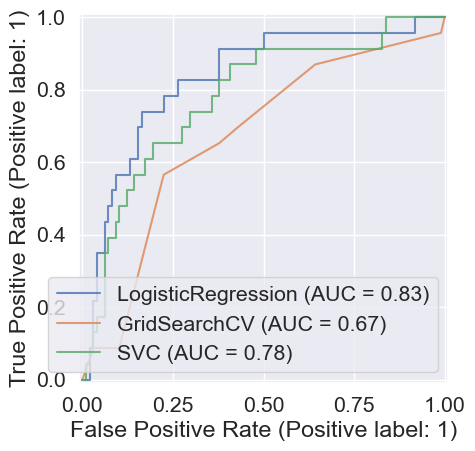

In [31]:
from sklearn.metrics import RocCurveDisplay
ax = plt.gca()
log_disp = RocCurveDisplay.from_estimator(model, X_test, y_test, ax=ax, alpha=0.8)
grid_dt_disp = RocCurveDisplay.from_estimator(grid_dt, X_test, y_test, ax=ax, alpha=0.8)
svm_disp = RocCurveDisplay.from_estimator(model_svm, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

In [29]:
from sklearn import tree
print(tree.export_text(model_dt))

|--- feature_20 <= 0.50
|   |--- feature_1 <= 0.18
|   |   |--- feature_0 <= 0.06
|   |   |   |--- feature_12 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_12 >  0.50
|   |   |   |   |--- class: 0
|   |   |--- feature_0 >  0.06
|   |   |   |--- feature_8 <= 0.50
|   |   |   |   |--- feature_0 <= 0.18
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  0.18
|   |   |   |   |   |--- feature_16 <= 0.50
|   |   |   |   |   |   |--- feature_11 <= 0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_11 >  0.50
|   |   |   |   |   |   |   |--- feature_1 <= 0.07
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_1 >  0.07
|   |   |   |   |   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_4 >  0.50
|   |   |   |   |   |   |   |   |   |--- feature_17 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   

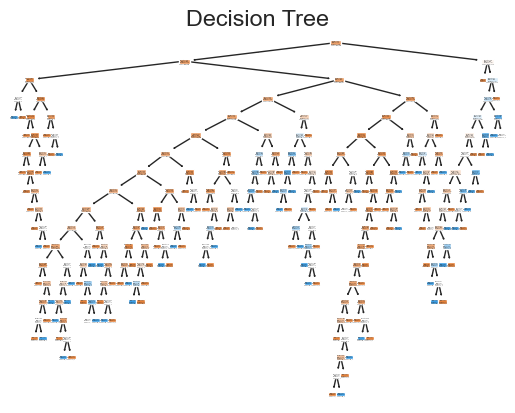

In [30]:
from sklearn.tree import plot_tree

plt.figure()
tree.plot_tree(clf, filled=True)
plt.title("Decision Tree")
plt.show()

In [38]:
for i, j in zip(range(len(X_train.columns)), X_train.columns):
    print(f"feature{i}:{j}")
# X_train.columns
# len(X_train.columns)

feature0:age
feature1:yearsmarried
feature2:gender_male
feature3:children_yes
feature4:religiousness_2
feature5:religiousness_3
feature6:religiousness_4
feature7:religiousness_5
feature8:education_12
feature9:education_14
feature10:education_16
feature11:education_17
feature12:education_18
feature13:education_20
feature14:occupation_2
feature15:occupation_3
feature16:occupation_4
feature17:occupation_5
feature18:occupation_6
feature19:occupation_7
feature20:rating_2
feature21:rating_3
feature22:rating_4
feature23:rating_5
